### 앙상블 기법 

#### Human Activity Recognition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep='\s+', header=None,   # sep='\s+' : 공백이 여러 개 있을 수 있음  
                            names=['column_index', 'column_name'])  # 컬럼명 지정 
                
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [3]:
feature_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [4]:
feature_name = feature_name_df.iloc[:, 1].values.tolist() # 모든 행의 두별 째 열 
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [8]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [9]:
X_train.columns = feature_name
X_test.columns = feature_name

X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [19]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_train.shape

((7352, 561), (2947, 561), (7352, 1), (7352, 1))

In [21]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

In [23]:
# GridSearchCV 를 사용하면 max_depth를 다양하게 할 수 있다.

from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [24]:
grid_cv.best_score_

0.8543335321892183

In [25]:
grid_cv.best_params_

{'max_depth': 8}

In [26]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


In [27]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Max_Depth =', depth, ', Accuracy =', accuracy)

Max_Depth = 6 , Accuracy = 0.8557855446216491
Max_Depth = 8 , Accuracy = 0.8707159823549372
Max_Depth = 10 , Accuracy = 0.8673227010519172
Max_Depth = 12 , Accuracy = 0.8646080760095012
Max_Depth = 16 , Accuracy = 0.8574821852731591
Max_Depth = 20 , Accuracy = 0.8547675602307431
Max_Depth = 24 , Accuracy = 0.8547675602307431


- max_depth= 8 일 때 가장 정확도가 높다. 

In [29]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.8734306073973532

In [30]:
# 랜덤 포레스트 적용 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6, 8, 10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

In [33]:
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [34]:
# 결과 정리 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [35]:
# 성능이 좋음 

target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


In [36]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)

In [37]:
grid_cv.best_score_

0.9151251360174102

In [38]:
# test 데이터에 적용 
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

C:\Users\LEESEYI\AppData\Local\Temp/ipykernel_30636/102698656.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_best.fit(X_train, y_train)


0.9205972175093315

In [39]:
best_cols_values = rf_clf_best.feature_importances_
best_cols_values  # 피쳐 전체의 영향력을 볼 수 있다. 

array([9.63570543e-05, 2.16715797e-04, 5.81975113e-05, 7.84266934e-03,
       2.51857403e-04, 3.07774386e-04, 4.79591810e-03, 4.09964695e-04,
       2.64005967e-04, 1.19698243e-02, 3.94764000e-05, 2.67806154e-04,
       2.07328000e-04, 9.88123061e-05, 1.40002321e-04, 9.16704113e-04,
       2.73999937e-03, 2.82976871e-04, 7.27134961e-04, 1.76970389e-03,
       3.45707764e-04, 1.36433644e-04, 1.23752152e-03, 1.57683401e-04,
       1.08862142e-04, 3.21316110e-04, 4.56947758e-05, 4.78143898e-05,
       7.90350892e-05, 5.10934027e-05, 5.07171302e-05, 7.02169848e-05,
       4.43780078e-05, 1.66771180e-04, 2.66769490e-05, 9.75250912e-06,
       1.04785140e-04, 4.25392011e-03, 7.78965780e-04, 5.38515789e-03,
       2.95128998e-02, 2.60520310e-02, 1.56883317e-02, 1.60383984e-03,
       6.74589552e-04, 5.46801242e-04, 1.67349902e-03, 5.74077616e-04,
       2.40162269e-04, 2.76616100e-02, 3.25178134e-02, 3.96718070e-03,
       2.77748342e-02, 2.30372983e-02, 8.84155484e-03, 4.06675092e-03,
      

In [40]:
# 컬럼 이름별로 매칭 시키기 
best_cols = pd.Series(best_cols_values, index=X_train.columns)
best_cols

tBodyAcc-mean()-X                       0.000096
tBodyAcc-mean()-Y                       0.000217
tBodyAcc-mean()-Z                       0.000058
tBodyAcc-std()-X                        0.007843
tBodyAcc-std()-Y                        0.000252
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000203
angle(tBodyGyroJerkMean,gravityMean)    0.000270
angle(X,gravityMean)                    0.034638
angle(Y,gravityMean)                    0.026553
angle(Z,gravityMean)                    0.012837
Length: 561, dtype: float64

In [41]:
# 영향력 상위 20개만 가져오기 
top20_cols = best_cols.sort_values(ascending=False)[:20]

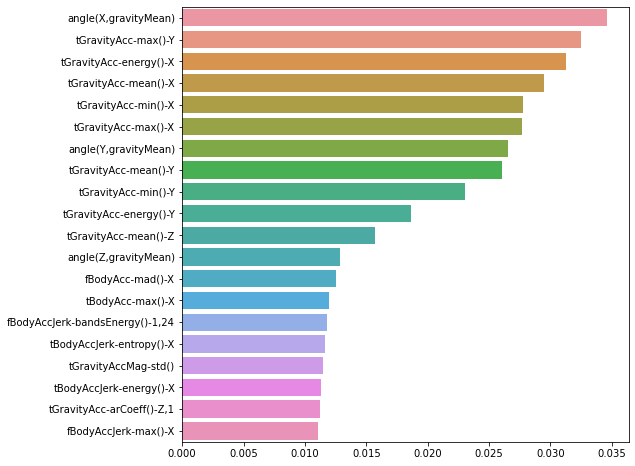

In [42]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()

- feature가 561개나 되는데 다 쓸 필요가 없다. 영향력이 높은 상위 몇개 만 추려서 사용 

In [44]:
# 20개 특성만 가지고 다시 성능 확인

X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1, ))

pred1_re = rf_clf_best_re.predict(X_test_re)

accuracy_score(y_test, pred1_re)

0.8177807940278249

- 561개의 특성보다 20개의 특성만 보면 연산속도가 정말 빠를 것이다. acc는 낮아질 수 있다는 점 감안 